Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   object 
 1   SeniorCitizen    7043 non-null   int64  
 2   Dependents       7043 non-null   object 
 3   tenure           7043 non-null   int64  
 4   PhoneService     7043 non-null   object 
 5   MultipleLines    7043 non-null   object 
 6   InternetService  7043 non-null   object 
 7   Contract         7043 non-null   object 
 8   MonthlyCharges   7043 non-null   float64
 9   Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 550.4+ KB
None
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000

C:\Users\fawad\AppData\Local\Temp\ipykernel_7904\1197929976.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


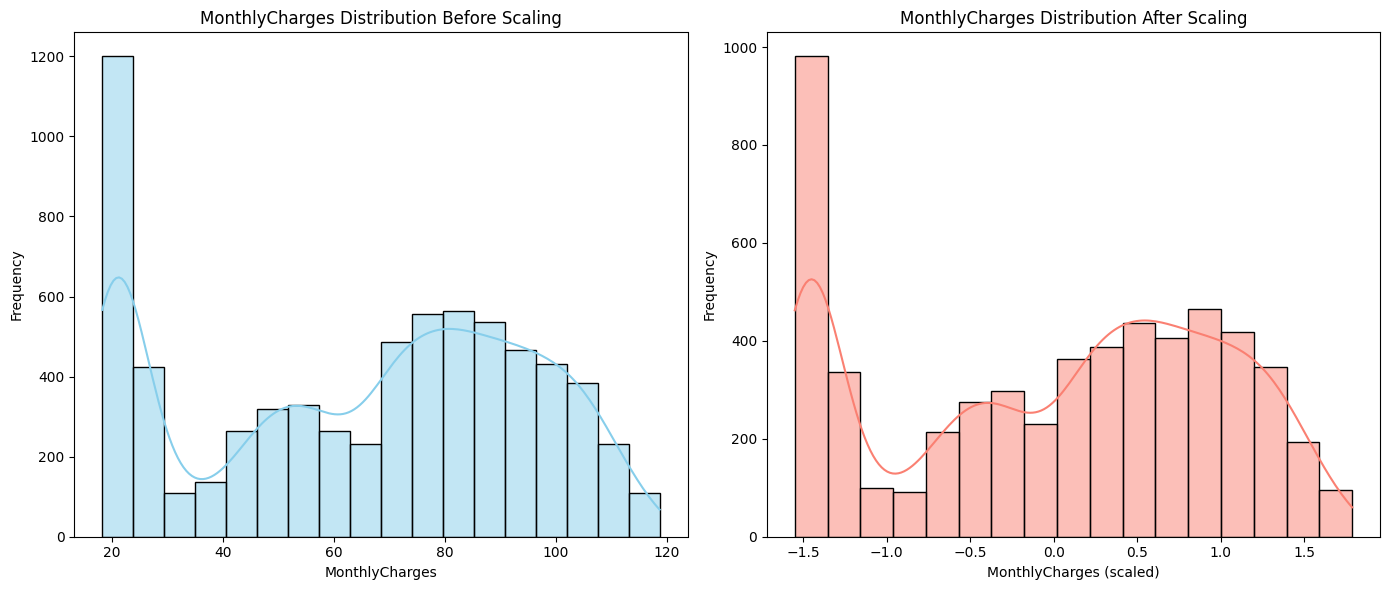

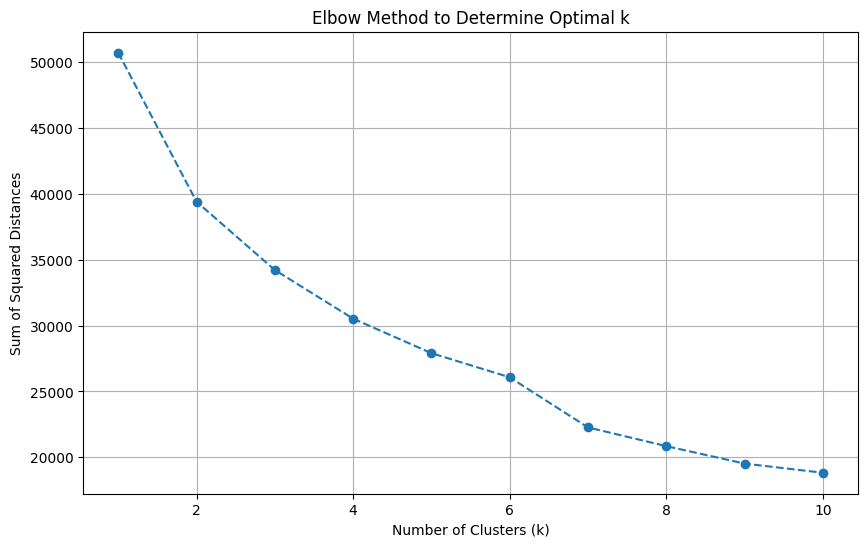

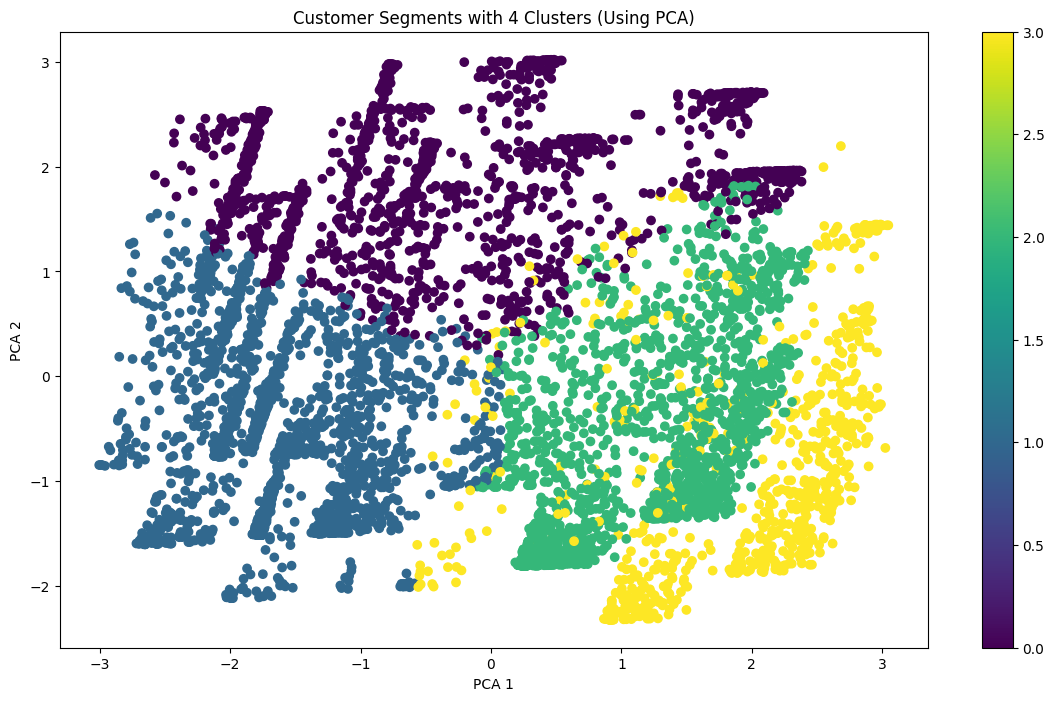

Data preparation and clustering analysis complete. Check the visualizations for results.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Load the dataset
df = pd.read_csv('Dataset (ATS).csv')

# Display basic info about the dataset
print("Initial Data Overview:")
print(df.info())
print(df.describe())

# Data Cleaning: Handling Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

# Impute missing values (example with forward fill)
df.fillna(method='ffill', inplace=True)

# Verify that missing values are handled
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

# Encode Categorical Variables
categorical_cols = ['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'Churn']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("\nData After Encoding Categorical Variables:")
print(df.head())

# Split the dataset into training and testing sets
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display 10 rows of the scaled training data
df_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
print("\n10 Rows of Prepared and Normalized Training Data:")
print(df_scaled.head(10))

# Plotting distributions before and after scaling for a feature (e.g., 'MonthlyCharges')
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], kde=True, color='skyblue')
plt.title('MonthlyCharges Distribution Before Scaling')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(X_train_scaled[:, X.columns.get_loc('MonthlyCharges')], kde=True, color='salmon')
plt.title('MonthlyCharges Distribution After Scaling')
plt.xlabel('MonthlyCharges (scaled)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Clustering Analysis

# Finding the optimal number of clusters using the elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    sse.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

# Using KMeans for clustering with optimal k (let's assume k=4 based on the elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# Save the trained model to a file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

# Adding cluster labels to the dataset
df['Cluster'] = kmeans.predict(scaler.transform(X))

# Visualizing the resulting clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(14, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title(f'Customer Segments with {optimal_k} Clusters (Using PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

print("Data preparation and clustering analysis complete. Check the visualizations for results.")
